# Aim 

The aim of this code is performing EDA of this HINTS data. Particularly we are interested in exploring the relationship between the elderly population and a couple other variables such as health seeking behaviour, internet usage, health app usage etc. some of the methods here are based on this article: https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

***Step 1*** We begin by importing the data and cleaning it up

In [1]:
import datetime
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
# Read the data file and take a look at the data
local_folder = '.'
df = pd.read_sas(os.path.join(local_folder, 'hints5_cycle3_public.sas7bdat'),encoding='mac_roman')

In [3]:
list(df.columns); #list all the columns in the data

In [4]:
# define dataframes that segment the population into the young and elderly
# the elderly are determined to be those who are 65 years of age and older; everyone else falls under the category of "young"
yng = df.loc[df['Age'] < 65,:]
eld = df.loc[df['Age'] >= 65,:]


***Step 2*** Conduct further cleaning including weights, dealing with invalid data etc

***Step 3*** Some EDA analysis

1. Begin with univariate analysis

In [5]:
#percentage by age for this population
percnt = eld.Age.value_counts(normalize=True)*100
percnt

65.0    7.649159
70.0    7.088220
72.0    6.935237
68.0    6.833248
66.0    6.374299
67.0    6.272310
69.0    4.946456
71.0    4.793473
76.0    4.691484
73.0    4.589495
74.0    4.232534
77.0    4.130546
75.0    4.079551
78.0    3.824579
82.0    2.753697
79.0    2.549720
80.0    2.396736
81.0    2.396736
84.0    1.886792
86.0    1.733809
87.0    1.631820
85.0    1.529832
83.0    1.478837
88.0    1.325854
89.0    0.866905
92.0    0.815910
90.0    0.662927
91.0    0.509944
93.0    0.407955
94.0    0.254972
97.0    0.152983
98.0    0.101989
95.0    0.101989
Name: Age, dtype: float64

***What does this mean*** Fewer respondants with age? or is it just a function of age distribution among the population

/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


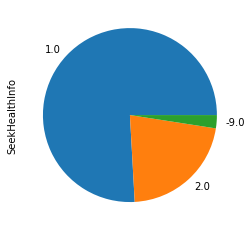

In [6]:
#plot of health seeking amongs elderly
eld.SeekHealthInfo.value_counts(normalize=True).plot.pie()
plt.show()

Over ***75%*** of elderly respondents said they seek health info

/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


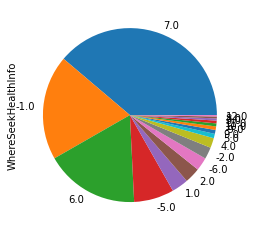

In [7]:
#plot of where people sought health info first last time they searched, 7 is internet, 6 is doctor or healthcare provider
eld.WhereSeekHealthInfo.value_counts(normalize=True, sort=True).plot(kind= 'pie', sort_columns=True)
plt.show()

7 is the selection for internet, 6 is for doctor. The majority of people go to the internet first when in need of health info

***What about technology ownership and usage?***

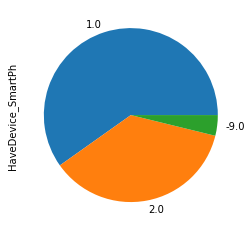

In [8]:
#plot of smartphone ownership
eld.HaveDevice_SmartPh.value_counts(normalize=True).plot(kind= 'pie', sort_columns=True)
plt.show()

about ***60%*** of respondents have smartphones

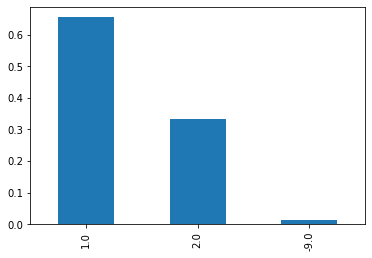

In [9]:
#plot of general internet usage among elderly
eld.UseInternet.value_counts(normalize=True).plot.bar()
plt.show()

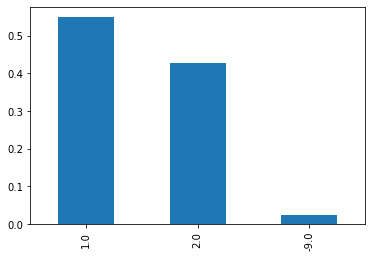

In [10]:
#use electronic devices to seek health info
eld.Electronic_SelfHealthInfo.value_counts(normalize=True).plot(kind= 'bar', sort_columns=True)
plt.show()

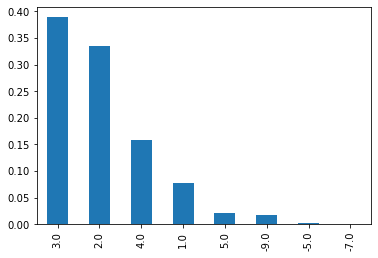

In [11]:
#plot of self reported health 1= excellent
eld.GeneralHealth.value_counts(normalize=True).plot.bar()
plt.show()

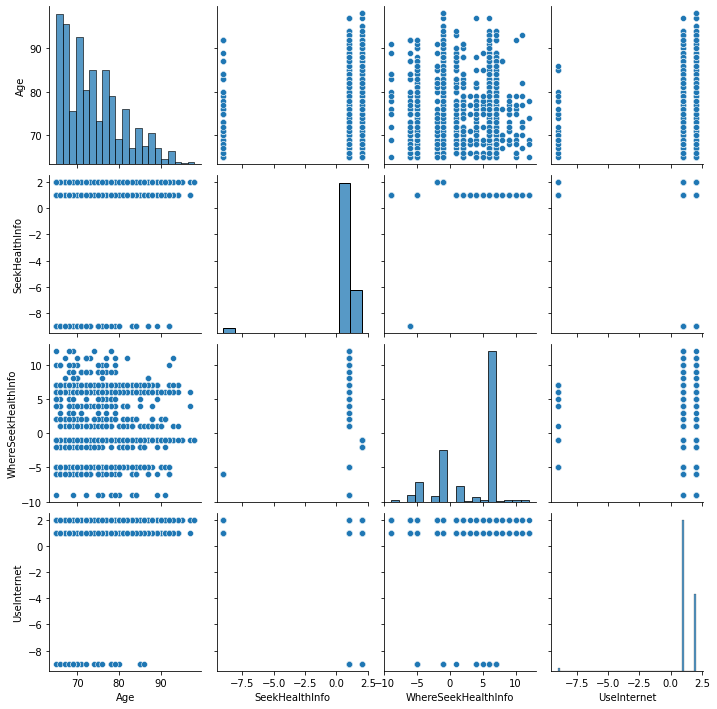

In [12]:
sns.pairplot(eld[["Age","SeekHealthInfo","WhereSeekHealthInfo","UseInternet"]])

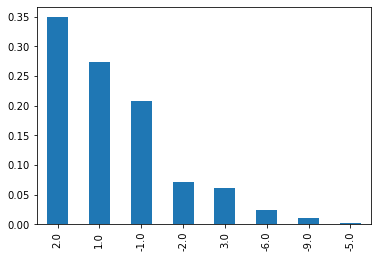

In [13]:
#plot showing health apps availability on tablets/smartphones
eld.TabletHealthWellnessApps.value_counts(normalize=True).plot.bar()
plt.show()

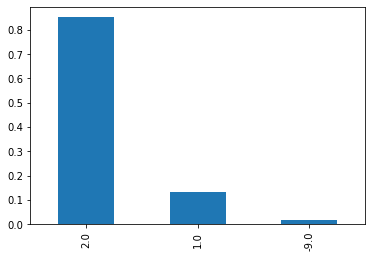

In [14]:
eld.WearableDevTrackHealth.value_counts(normalize=True).plot.bar()
plt.show()

2. The next section contains some bivariate analysis

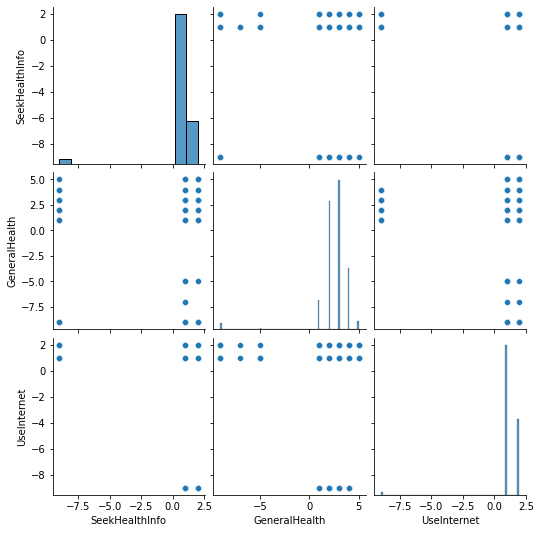

In [15]:
#pair plot of age, generalhealth and health seeking behaviour 
sns.pairplot(data = eld, vars=['SeekHealthInfo','GeneralHealth', 'UseInternet'])
plt.show()

In [16]:
# Creating a correlation matrix
eld[['SeekHealthInfo','GeneralHealth','UseInternet','TabletHealthWellnessApps']].corr()

,SeekHealthInfo,GeneralHealth,UseInternet,TabletHealthWellnessApps
SeekHealthInfo,1.000000,0.038056,0.003444,-0.024571
GeneralHealth,0.038056,1.000000,0.012094,0.034888
UseInternet,0.003444,0.012094,1.000000,0.207384
TabletHealthWellnessApps,-0.024571,0.034888,0.207384,1.000000


/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


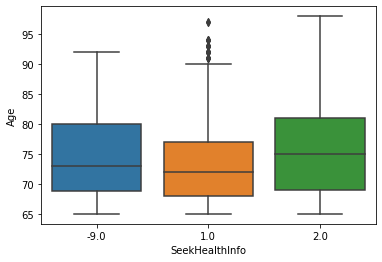

In [17]:
#box plot of health seeking behaviour and age
sns.boxplot(eld.SeekHealthInfo, eld.Age)
plt.show()

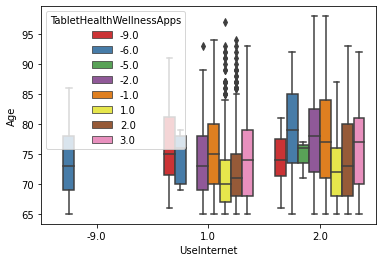

In [18]:
#box plot of health seeking behaviour and age
sns.boxplot(x='UseInternet',y="Age",hue ='TabletHealthWellnessApps',data=eld, palette="Set1")
plt.show()



/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


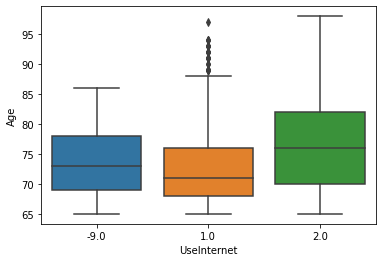

In [19]:
#box plot of Internet Usage and age
sns.boxplot(eld.UseInternet,eld.Age)
plt.show()

/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


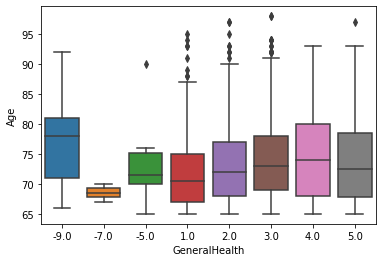

In [20]:
#box plot of general health and age
sns.boxplot(eld.GeneralHealth, eld.Age)
plt.show()

/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


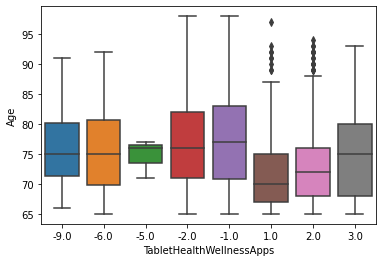

In [21]:
#box plot of Tablet health wellness App and age
sns.boxplot(eld.TabletHealthWellnessApps, eld.Age)
plt.show()

TabletHealthWellnessApps             -9.0       -6.0  -5.0       -2.0  \
UseInternet HaveDevice_SmartPh                                          
-9.0        -9.0                      NaN  73.791667   NaN        NaN   
 1.0        -9.0                      NaN  74.400000   NaN        NaN   
             1.0                72.750000        NaN   NaN        NaN   
             2.0                77.333333        NaN   NaN  74.476190   
 2.0        -9.0                      NaN  78.631579  76.5        NaN   
             1.0                75.500000        NaN  71.0        NaN   
             2.0                71.000000        NaN   NaN  77.838384   

TabletHealthWellnessApps             -1.0        1.0        2.0        3.0  
UseInternet HaveDevice_SmartPh                                              
-9.0        -9.0                      NaN        NaN        NaN        NaN  
 1.0        -9.0                      NaN  75.750000  72.166667  93.000000  
             1.0                  

<AxesSubplot:xlabel='TabletHealthWellnessApps', ylabel='UseInternet-HaveDevice_SmartPh'>

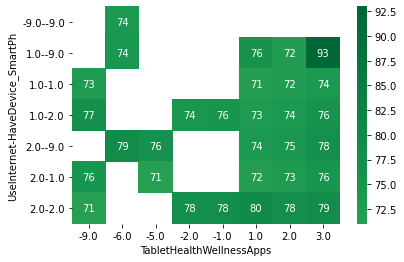

In [22]:
#pivot table
piv_tbl = pd.pivot_table(data=eld, index=['UseInternet','HaveDevice_SmartPh'], columns='TabletHealthWellnessApps',values='Age')
print(piv_tbl)

#create heat map of education vs marital vs response_rate
sns.heatmap(piv_tbl, annot=True, cmap = 'RdYlGn', center=0.117)

<AxesSubplot:xlabel='Age'>

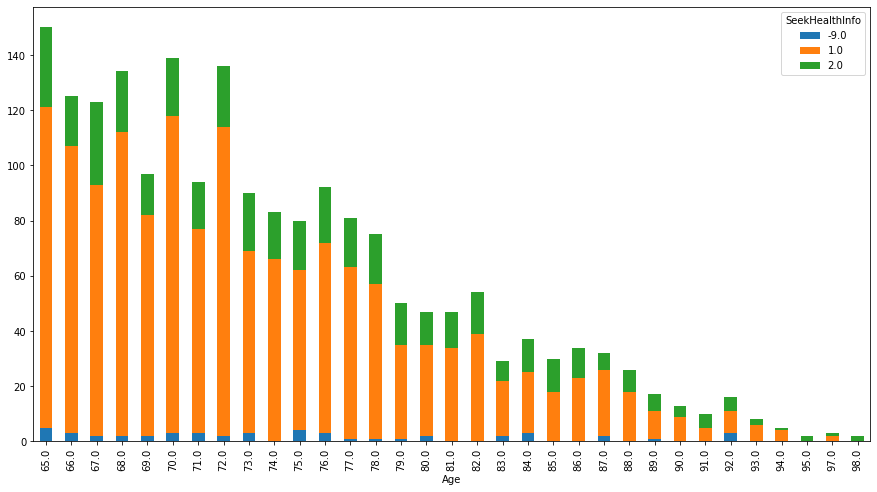

In [23]:
l= eld.groupby(["Age","SeekHealthInfo"])["PersonID"].count().reset_index()
l.set_index(['Age',"SeekHealthInfo", ]).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

<AxesSubplot:xlabel='AgeGrpB'>

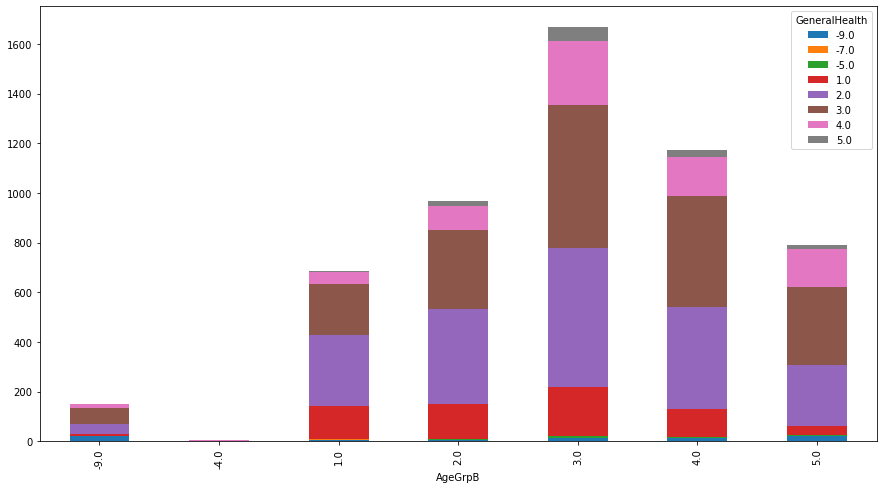

In [47]:
m= df.groupby(["AgeGrpB", 'GeneralHealth'])["PersonID"].count().reset_index()
m.set_index([ "AgeGrpB",'GeneralHealth']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

<AxesSubplot:xlabel='HaveDevice_SmartPh'>

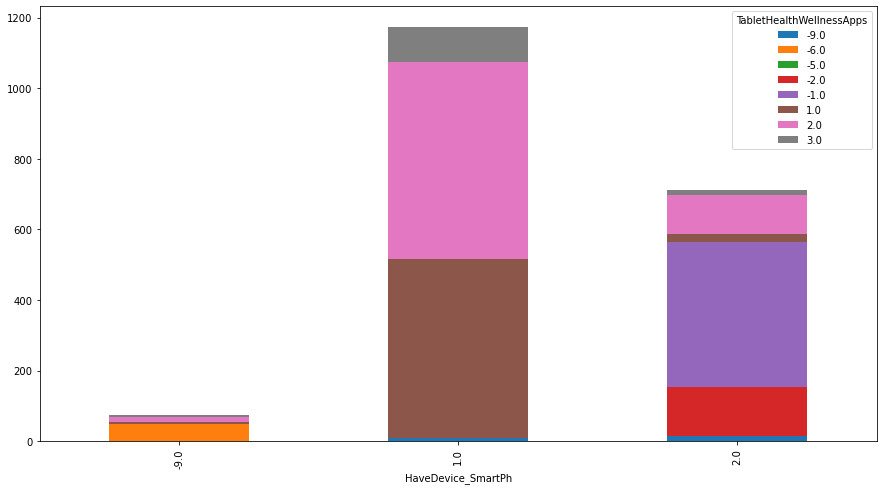

In [25]:
n= eld.groupby(["HaveDevice_SmartPh", 'TabletHealthWellnessApps'])["PersonID"].count().reset_index()
n.set_index([ "HaveDevice_SmartPh",'TabletHealthWellnessApps']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

<AxesSubplot:xlabel='AgeGrpB'>

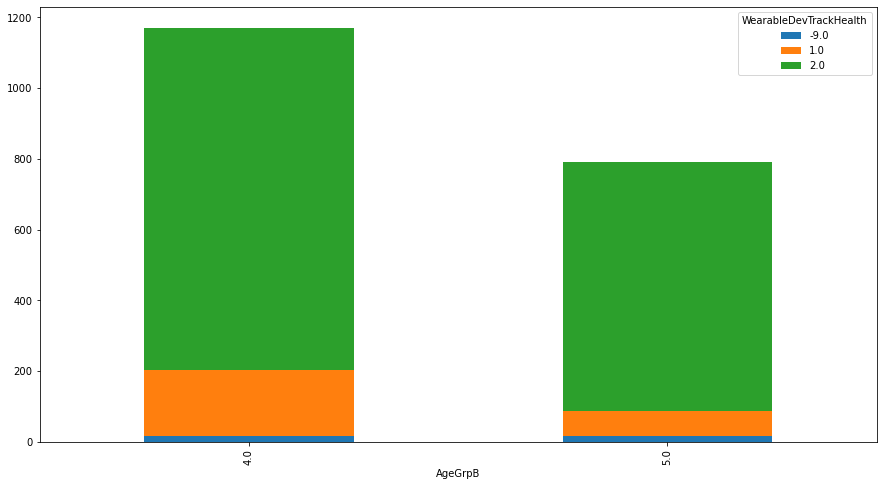

In [46]:
o= eld.groupby(["AgeGrpB", 'WearableDevTrackHealth'])["PersonID"].count().reset_index()
o.set_index([ "AgeGrpB",'WearableDevTrackHealth']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

<AxesSubplot:xlabel='AgeGrpB'>

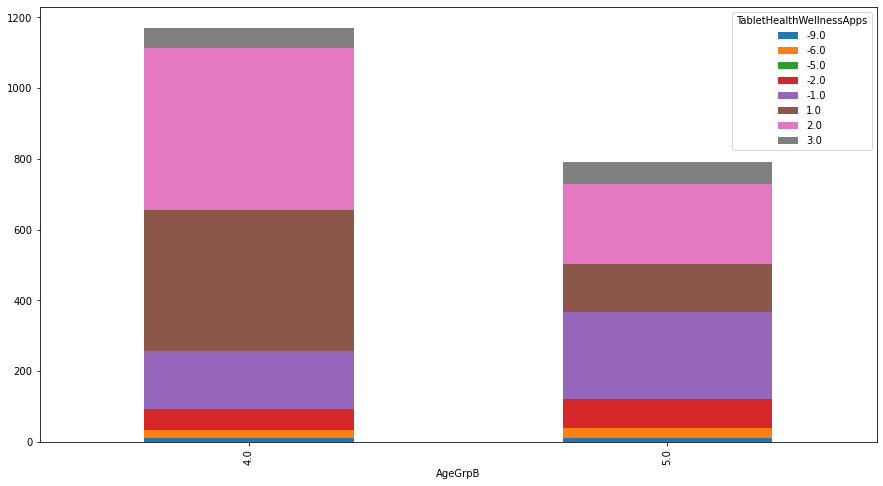

In [27]:
p= eld.groupby(["AgeGrpB", 'TabletHealthWellnessApps'])["PersonID"].count().reset_index()
p.set_index([ "AgeGrpB",'TabletHealthWellnessApps']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

<AxesSubplot:xlabel='Age'>

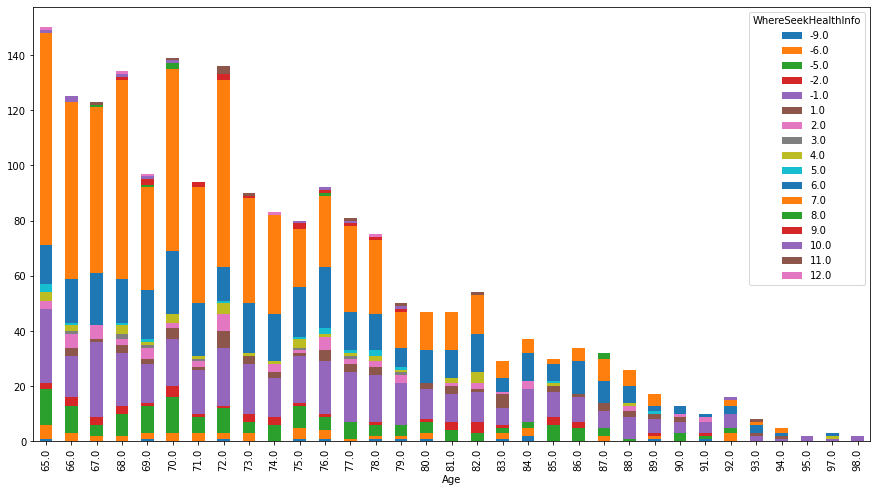

In [28]:
q= eld.groupby(["Age", 'WhereSeekHealthInfo'])["PersonID"].count().reset_index()
q.set_index([ "Age",'WhereSeekHealthInfo']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

<AxesSubplot:xlabel='UseInternet'>

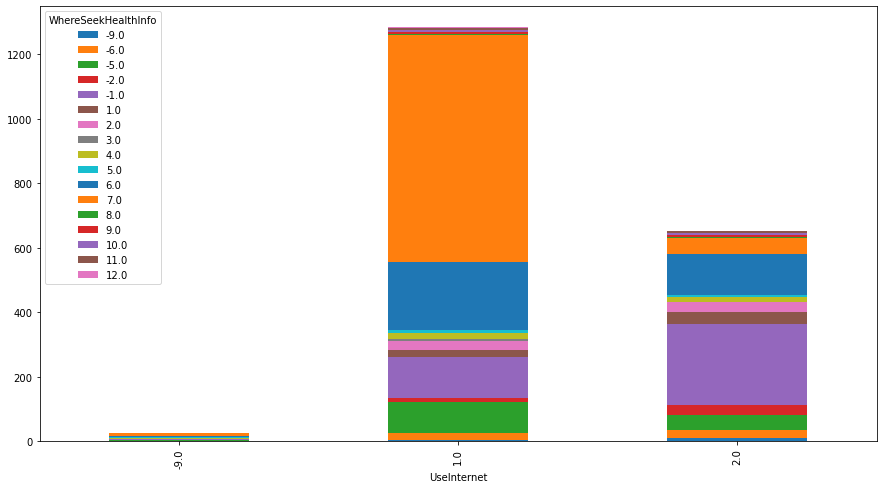

In [29]:
r= eld.groupby(["UseInternet", 'WhereSeekHealthInfo'])["PersonID"].count().reset_index()
r.set_index([ "UseInternet",'WhereSeekHealthInfo']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

<AxesSubplot:xlabel='UseInternet'>

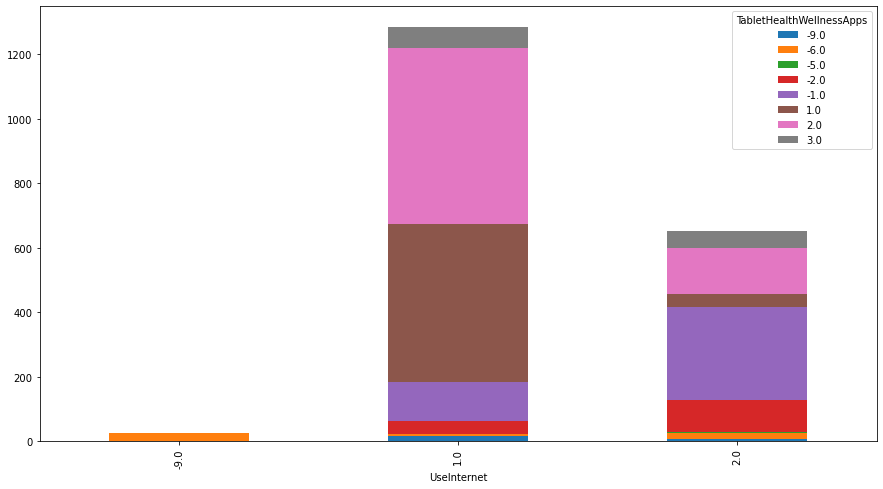

In [30]:
s= eld.groupby(["UseInternet", 'TabletHealthWellnessApps'])["PersonID"].count().reset_index()
s.set_index([ "UseInternet",'TabletHealthWellnessApps']).unstack()['PersonID']\
  .plot(kind='bar', stacked=True, figsize=(15,8))

This is a K - Means clustering exercise, largely based on code from https://medium.com/@blazetamareborn/practicing-clustering-techniques-on-survey-dataset-f7d7a322e6ff
and https://gitlab.com/blazetamareborn/StudentSurveyClustering/-/blob/master/training/TrainKMeans.py

In [31]:
#x = eld[["Age","SeekHealthInfo","UseInternet","HaveDevice_Tablet","RUC2013","WhereSeekHealthInfo"]]
x = eld[["SeekHealthInfo","HaveDevice_Tablet","UseInternet"]]

In [32]:
x

,SeekHealthInfo,HaveDevice_Tablet,UseInternet
0,2.0,2.0,2.0
3,1.0,2.0,1.0
5,2.0,2.0,2.0
7,1.0,2.0,2.0
10,-9.0,2.0,2.0
...,...,...,...
5420,2.0,1.0,2.0
5424,1.0,2.0,1.0
5431,1.0,1.0,1.0
5432,2.0,1.0,2.0


In [33]:
pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(x)

In [34]:
X_pca

array([[-1.06966462, -1.06360133],
       [-0.73612139, -0.03823806],
       [-1.06966462, -1.06360133],
       ...,
       [ 0.19662053, -0.02028375],
       [-0.13692269, -1.04564701],
       [-0.73612139, -0.03823806]])

In [35]:
pca.explained_variance_ratio_.cumsum()[1]

0.8798253146394068

/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/nigel

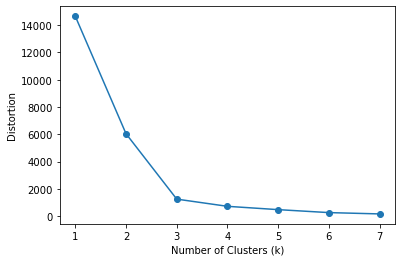

In [36]:
distortions = []
K_to_try = range(1, 8)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [37]:
# use the best K from elbow method
model = KMeans(
    n_clusters=4,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(X_pca)

y = model.predict(X_pca)

/Users/nigelmevana/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


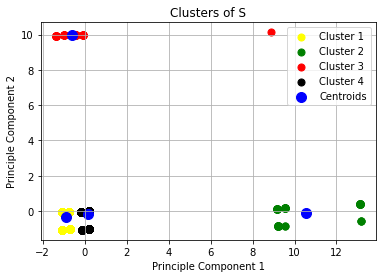

In [38]:
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], s = 50, c = 'black', label = 'Cluster 4')


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of S')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()


In [39]:
print(collections.Counter(y))

Counter({0: 975, 3: 864, 1: 74, 2: 48})


In [40]:
y.size

1961

In [41]:
y = pd.DataFrame(y, columns=['cluster'])
raw_result_pca = pd.concat([x.reset_index(), y], axis=1)


In [42]:
raw_result_pca 
#x

,index,SeekHealthInfo,HaveDevice_Tablet,UseInternet,cluster
0,0,2.0,2.0,2.0,0
1,3,1.0,2.0,1.0,0
2,5,2.0,2.0,2.0,0
3,7,1.0,2.0,2.0,0
4,10,-9.0,2.0,2.0,2
...,...,...,...,...,...
1956,5420,2.0,1.0,2.0,3
1957,5424,1.0,2.0,1.0,0
1958,5431,1.0,1.0,1.0,3
1959,5432,2.0,1.0,2.0,3


In [43]:
raw_result_pca[raw_result_pca['cluster']==3].iloc[:, 1:3].mean(axis = 1)

7       1.0
9       1.5
10      1.0
12      1.0
14      1.0
       ... 
1953    1.0
1954    1.0
1956    1.5
1958    1.0
1959    1.5
Length: 864, dtype: float64

In [44]:
raw_result_pca.loc[raw_result_pca['cluster']==3,:]

,index,SeekHealthInfo,HaveDevice_Tablet,UseInternet,cluster
7,16,1.0,1.0,1.0,3
9,20,2.0,1.0,1.0,3
10,24,1.0,1.0,1.0,3
12,26,1.0,1.0,1.0,3
14,29,1.0,1.0,2.0,3
...,...,...,...,...,...
1953,5414,1.0,1.0,1.0,3
1954,5418,1.0,1.0,1.0,3
1956,5420,2.0,1.0,2.0,3
1958,5431,1.0,1.0,1.0,3


In [45]:
raw_result_pca.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
